In [1]:
!pip install scikit-learn

In [2]:
!pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2012-01-01'
end = '2022-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

/tmp/ipython-input-843295610.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.449755,16.517492,16.127389,16.141482,147611217
1,2012-01-04,16.520704,16.569406,16.331340,16.440361,114989399
2,2012-01-05,16.291538,16.414156,16.222813,16.368669,131808205
3,2012-01-06,16.069292,16.316009,16.063605,16.294995,108119746
4,2012-01-09,15.387977,15.994636,15.357569,15.982274,233776981
...,...,...,...,...,...,...
2763,2022-12-23,89.141418,89.429260,86.967727,86.967727,17815000
2764,2022-12-27,87.275421,88.833733,86.883365,88.645145,15470900
2765,2022-12-28,85.816353,87.861015,85.727026,86.848612,17879600


In [7]:
ma_100_days = data.Close.rolling(100).mean()

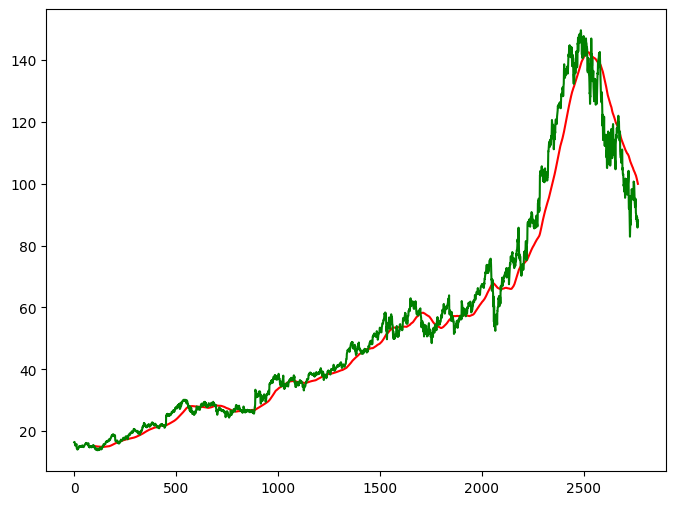

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

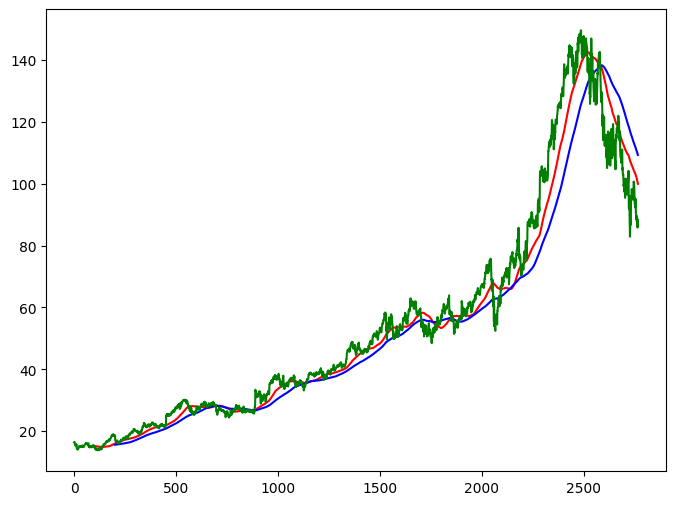

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])

In [13]:
data_train.shape[0]

2214

In [14]:
data_test.shape[0]

554

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100: i])
  y.append(data_train_scale[i, 0])

In [18]:
x, y = np.array(x), np.array(y)

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True, input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - loss: 0.0870
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0079
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0083
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0054
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0062
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0051
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0066
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0050
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0062
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0044
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0041
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0042
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0044
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0037
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0040
Ep

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
past_100_days = data_train.tail(100)

In [25]:
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

In [26]:
data_test_scale = scaler.fit_transform(data_test)

In [27]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100: i])
  y.append(data_test_scale[i, 0])

x, y = np.array(x), np.array(y)

In [28]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step


In [29]:
scale = 1 / scaler.scale_

In [30]:
y_predict = y_predict * scale

In [31]:
y = y * scale

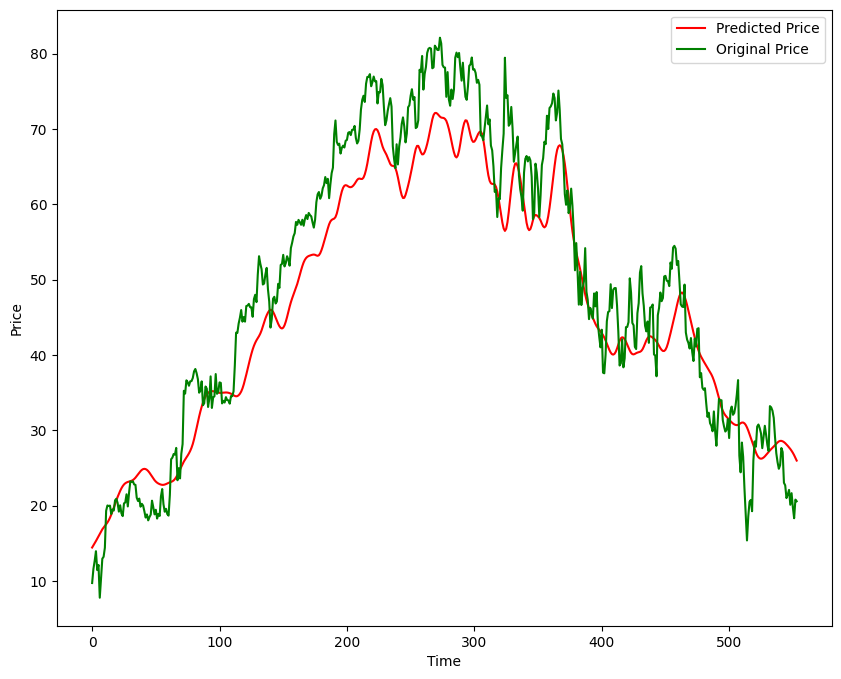

In [32]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
model.save('Stock Predictions Model.keras')